Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# OSCILACIJE (prigušene i prinudne)
## 23.03.2021. 

# Pavle Janevski 2020/0055

***
<font color='red'>
Preimenovati svesku: File/Rename u __prigusene_prinudne_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

### __Zadatak 1__: 
Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$. Poznate su vrednosti sopstvene kružne učestanosti $\omega_0$, faktora prigušenja $\alpha$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Formirati Python definiciju __prigusene__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode. Funkcija poziva parametre $\omega_0$ i $\alpha$.

In [40]:
def prigusene(y, t, omega0, alfa): 
    y1, y2 = y
    return [y2, -2*alfa*y2 - omega0**2 * y1]

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula.

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

c) Definisati vrednosti sopstvene kružne učestanosti $ω_0 = 1$ rad/s, i listu četiri različite vrednosti koje uzima faktor prigušenja: $α_1 = ω_0$, $α_2 = ω_0/10$, $α_3 = 15ω_0$ i $α_4 = 0$. <br>
Definisati početne uslove: telo se u početnom trenutku nalazi na rastojanju $x_0 = 10$ m od ravnotežnog položaja i ima brzinu $v_0 = 20$ m/s.<br>
Definisati vremensku osu: $0$ do $60$ sekundi u $1000$ ekvidistantnih tačaka.

In [42]:
#pocetni uslovi i parametri
omega0 = 1
alfa_niz = [omega0, omega0/10, 15*omega0, 0]
x0 = 10
v0 = 20
t = np.linspace(0, 60, 1000)

d) Napisati kod koji omogućava da se u okviru istog Figure prozora korišćenjem naredbe subplot, iscrtaju vremenski odzivi $x(t)$ za sve četiri vrednosti faktora prigušenja. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja $α$.<br>
_Da bi se prikazao grafik potrebno je izvršiti komandu plt.show()_

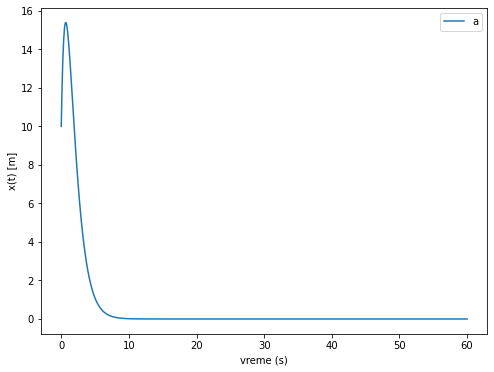

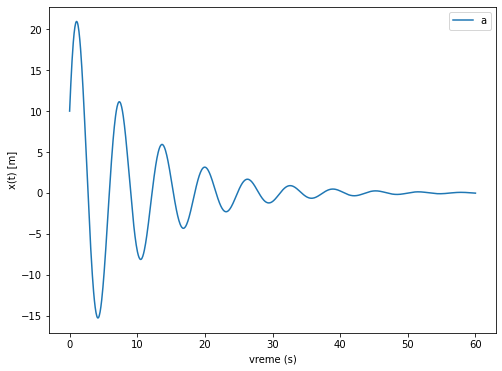

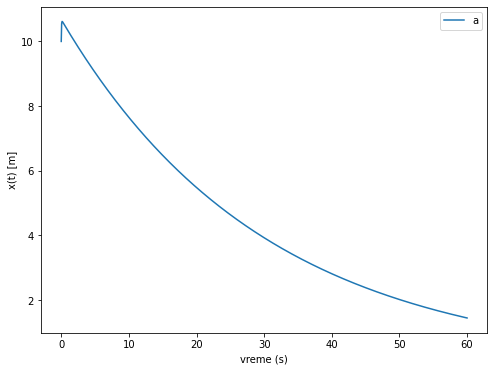

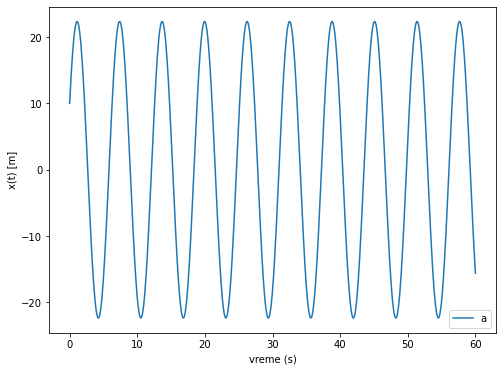

In [43]:
#za svako alfa iz niza crtamo odredjeni grafik
for i,alfa in enumerate(alfa_niz):
    sol = integrate.odeint(prigusene, (x0, v0), t, (omega0, alfa))
    plt.figure(figsize=(8,6))
    plt.plot(t, sol[:,0])
    plt.xlabel("vreme (s)")
    plt.ylabel("x(t) [m]")
    plt.legend("alfa" + str(i))
    plt.show() 

e) Napisati kod koji omogućava da se u okviru istog Figure prozora korišćenjem naredbe subplot, iscrtaju fazni dijagrami za sve četiri vrednosti faktora prigušenja. Označiti ose grafika (“x [m]” i “v(t) [m/s]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja  $α$ .

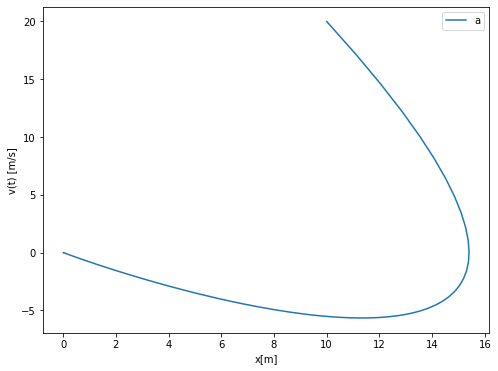

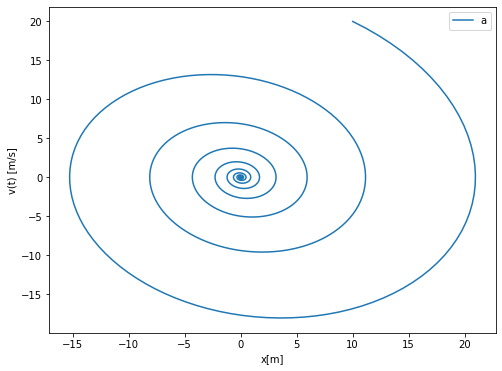

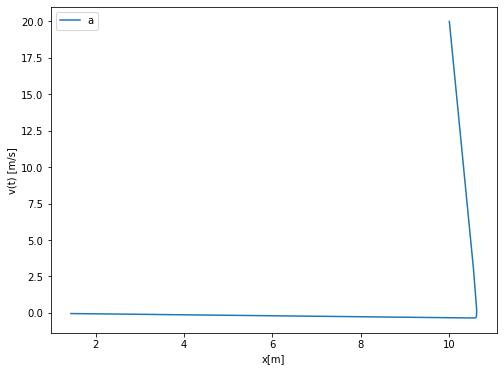

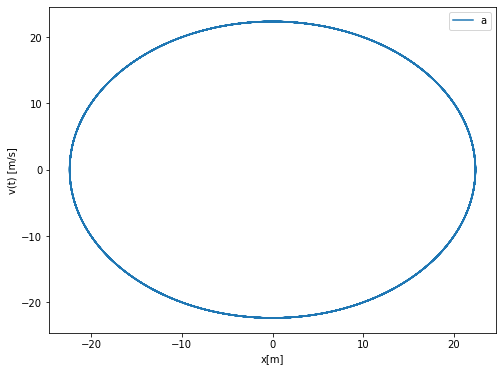

In [44]:
#za svako alfa iz niza crtamo odredjeni grafik
for i,alfa in enumerate(alfa_niz):
    sol = integrate.odeint(prigusene, (x0, v0), t, (omega0, alfa))
    plt.figure(figsize=(8,6))
    plt.plot(sol[:,0], sol[:,1])
    plt.xlabel("x[m]")
    plt.ylabel("v(t) [m/s]")
    plt.legend("alfa" + str(i))
    plt.show() 

f) Na osnovu prethodna dva grafika odrediti tip oscilacija za svaku od vrednosti koeficijenta prigušenja. Proceniti vremenski trenutak u kom se dostiže stacionarno stanje (ako se dostiže) i navesti ga za svaki od prikazanih grafika. Dodatno, za svaki tip oscilacija prokomentarisati i ukratko prodiskutovati oblik faznog dijagrama.

-alfa0 - kriticno prigusene oscilacije, stacionarno stanje na priblizno 10 sekundi
-alfa1 - kvazi-periodicne oscilacije, stacionarnjo stanje na priblizno 60 sekundi
-lfa2 - aperiodicne oscilacije, stacionarno stanje na priblizno 60 sekundi
-alfa3 - linearne harmonijske oscilacije, ne dostize se stacionarno stanje

g) Napisati kod koji omogućava da se na istom dijagramu iscrtaju zavisnost kinetičke (plavom bojom) i potencijalne energije (crvenom bojom) sistema od vremena $t$ za faktor prigušenja $α = ω_0/10$, ako je masa tela koje osciluje $m = 1 $kg.

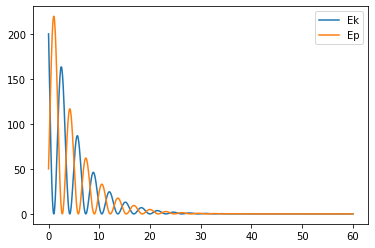

In [45]:
m = 1
a = omega0/10
sol = integrate.odeint(prigusene, (x0, v0), t, (omega0, a))
x_niz = sol[:,0]
v_niz = sol[:,1]
k = omega0**2 * m
Ek = (m * v_niz**2) / 2
Ep = (k * x_niz**2) / 2
plt.plot(t, Ek)
plt.plot(t, Ep)
plt.legend(["Ek","Ep"])
plt.show()

h) Napisati kod koji omogućava da se iscrta zavisnost ukupne energije sistema za parametre kao u prethodnoj tački (tačka g)) i komentarisati dobijeni grafik. Zašto grafik nije glatka, opadajuća funkcija?

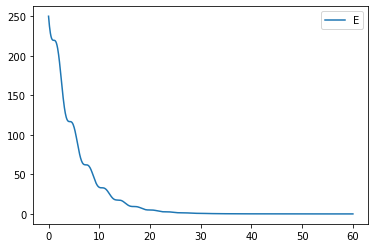

In [46]:
plt.plot(t, Ek + Ep)
plt.legend("Ek + Ep")
plt.show()

U numerickim proracunima dolazi do greske pa zbog toga grafik ne izgleda kao teorijski grafik.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

### __Zadatak 2__: 
Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$ i spoljašnja harmonijska sila amplitude $F_0$ i kružne učestanosti $Ω$ koja ima za cilj da kompenzuje disipaciju energije u ovom sistemu. Poznate su vrednosti sopstvene kružne učestanosti $ω_0$, faktora prigušenja $α$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Formirati Python definiciju __prinudne__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode. Funkcija poziva parametre $\omega_0$, $\alpha$, $F_0$, $m$ i $Ω$.

In [47]:
def prinudne(y, t, omega0, alfa, F0, m, omega):
    y1, y2 = y
    return [y2,F0/m * np.sin(omega * t) - 2*alfa*y2 - omega0**2 * y1]

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula 

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

c) Poznate su vrednosti sopstvene kružne učestanosti $ω_0 = 10$ rad/s, faktora prigušenja $α = ω_0/20$, amplitude $F_0 = 20$ N i kružne učestanosti $Ω = 2$ rad/s prinudne sile. Masa tela je $m = 1$ kg.<br>
Definisati početne uslove: Telo u početnom trenutku miruje na rastojanju $x_0 = 10$ m od ravnotežnog položaja.<br>
Definisati vremensku osu: $0$ do $60$ sekundi u $6000$ ekvidistantnih tačaka.

In [49]:
omega0 = 10
alfa = omega0/20
F0 = 20
omega = 2
m = 1
x0 = 10
t = np.linspace(0, 60, 6000)

d) Napisati kod koji omogućava da se iscrta grafik vremenskog odziva $x(t)$. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). 

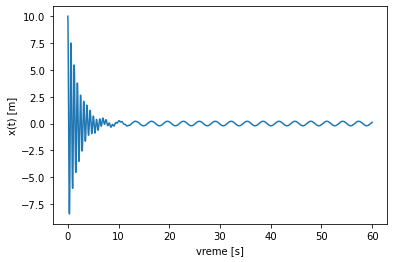

In [50]:
sol = integrate.odeint(prinudne, (x0, 0), t, (omega0, alfa, F0, m, omega))
plt.plot(t,sol[:,0])
plt.xlabel("vreme [s]")
plt.ylabel("x(t) [m]")
plt.show()

e) Napisati kod koji omogućava da se iscrta fazni dijagram $v(x)$. Označiti ose grafika (“x(t) [m]” i “v(t) [m/s]”). 

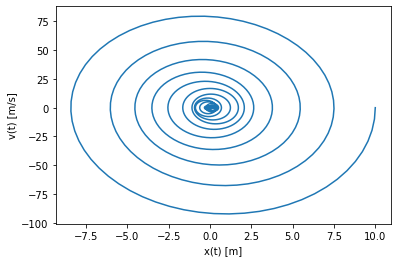

In [51]:
plt.plot(sol[:,0],sol[:,1])
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.show()

f) Šta se uočava na faznom dijagramu u trenutku kada u vremenskom odzivu preostaju samo oscilacije kao posledica prinudne sile? Napisati kod koji omogućava da se iscrta dodatni grafik, zumirani fazni dijagram, tako da limiti za $x$ osu budu od $-0.5$ do $0.5$, a za $y$ osu od $-4$ do $4$. 

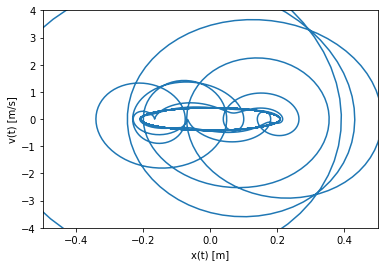

In [52]:
plt.plot(sol[:,0],sol[:,1])
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.xlim(-0.5, 0.5)
plt.ylim(-4, 4)
plt.show()

Uocava se elipsa, koja predstavlja posledicu prinudnih oscilacija, kada samo prinudna sila preuzme oscilovanje

g) Neka se frekvencija prinudne sile menja u opsegu frekvencija $Ω = [0, 2ω_0]$ sa korakom $ω_0/50$. Napisati kod koji omogućava da se iscrta amplitudska karaterisktika prinudnog odziva $A(Ω)$ koristeći se analitičkim izrazom za amplitudsku karakteristiku (sa slajdova). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "analitička metoda".

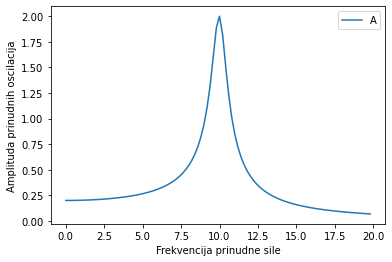

In [53]:
omega_niz = np.arange(0,2*omega0,omega0/50)
A_niz = (F0/m) / np.sqrt((omega0**2 - omega_niz**2)**2 + (2 * alfa * omega_niz)**2)
plt.plot(omega_niz, A_niz)
plt.xlabel("Frekvencija prinudne sile")
plt.ylabel("Amplituda prinudnih oscilacija")
plt.legend('Analiticka metoda')
plt.show()

h) Napisati kod koji omogućava numeričko određivanje amplitudske karakteristike. Iscrtati amplitudsku karaterisktiku dobijenu numeričkom metodom (isprekidanom crvenom linijom). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "numerička metoda".<br>
_Hint:_ Rešiti jednačinu za svako $Ω$ iz opsega $[0, 2ω_0]$ na vremenskoj osi od $0$ do $300$ sekundi u $2000$ ekvidistantnih tačaka. Vremenska osa je produžena da bi bili sigurni da je sistem dostigao stacionarno stanje, tj. da je prelazni režim u kom postoje prigušene oscilacije završen. Amplituda oscilacija u stacionarnom odzivu se može naći kao maksimalni element niza na zadatom vremenskom intervalu. 

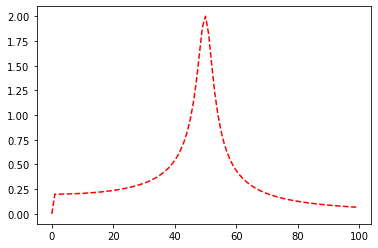

In [54]:
tt = np.linspace(0, 300, 2000)
amplitude = []
for omegax in omega_niz:
    sol = integrate.odeint(prinudne, (x0, 0), tt, (omega0, alfa, F0, m, omegax))
    sol0 = sol[:,0][1600:]
    amplitude.append(max(sol0))
plt.plot(amplitude, color = "red", linestyle = "--")
plt.show()

i)	Napisati kod koji omogućava da se iz numerički dobijene amplitudske karakteristike odredi pri kojoj frekvenciji pobudne sile numerička kriva dostiže maksimalnu vrednost. Ova vrednost frekvencije naziva se rezonantna frekvencija. Prikazati numerički određenu vrednost za rezonantnu učestanost. Prikazati vrednost za rezonantnu učestanost koja se dobija na osnovu analitičkog izraza prikazanog na slajdovima. Izračunati relativno odstupanje za rezonantnu učestanost određenu numerički u odnosu na učestanost određenu na osnovu analitičkog izraza. 

In [55]:
numericki_maks = amplitude.index(max(amplitude)) * omega0 / 50
analiticki_maks = np.sqrt(omega0**2 - 2 * alfa**2)
print(numericki_maks)
print(analiticki_maks)
print((numericki_maks - analiticki_maks) / numericki_maks)

10.0
9.974968671630002
0.0025031328369998105
